In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
plt.rcParams.update({
    'text.usetex' : True,
    'font.family' : 'serif',
    'font.serif' : ['Computer Modern']
})

In [3]:
np.random.seed(100)

In [4]:
DF = pd.read_csv('data_for_ml.csv')
DF.head(2)

,INDEX_,HOUR,DAYOFWEEK,VISIBILITY,LIGHT,RDSFCOND,TEMP,REL_HUMID,LOCCOORD,TRAFFCTL,ROADCLASS,SPEEDLMT,VEH_ADT,PED_ADT,LAND_USE,POP_2021,PRIV_DWELL,LAND_AREA,INVAGE,PEDCOND,PEDACT,VEHINV,VIOL,INJURY
0,3366652,7,weekday,Other,Dark,Wet,1.5,0.99,Midblock,No Control,Major Arterial,60,498.0,219.0,Mixed Use,504,263,225,45 to 64,Distracted,Crossing without ROW,automobile,speeding,Major
1,3370334,19,weekday,Rain,Dark,Wet,4.8,1.00,Midblock,Traffic Signal including Transit,Major Arterial,60,351.0,63.0,Residential,452,205,183,Over 65,Normal,Crossing without ROW,automobile,speeding,Major


In [5]:
df = DF.drop('INDEX_', axis=1)
df.head(2)

,HOUR,DAYOFWEEK,VISIBILITY,LIGHT,RDSFCOND,TEMP,REL_HUMID,LOCCOORD,TRAFFCTL,ROADCLASS,SPEEDLMT,VEH_ADT,PED_ADT,LAND_USE,POP_2021,PRIV_DWELL,LAND_AREA,INVAGE,PEDCOND,PEDACT,VEHINV,VIOL,INJURY
0,7,weekday,Other,Dark,Wet,1.5,0.99,Midblock,No Control,Major Arterial,60,498.0,219.0,Mixed Use,504,263,225,45 to 64,Distracted,Crossing without ROW,automobile,speeding,Major
1,19,weekday,Rain,Dark,Wet,4.8,1.00,Midblock,Traffic Signal including Transit,Major Arterial,60,351.0,63.0,Residential,452,205,183,Over 65,Normal,Crossing without ROW,automobile,speeding,Major


In [6]:
# Label Encode 'object' datatypes
for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
df.head(2)

,HOUR,DAYOFWEEK,VISIBILITY,LIGHT,RDSFCOND,TEMP,REL_HUMID,LOCCOORD,TRAFFCTL,ROADCLASS,SPEEDLMT,VEH_ADT,PED_ADT,LAND_USE,POP_2021,PRIV_DWELL,LAND_AREA,INVAGE,PEDCOND,PEDACT,VEHINV,VIOL,INJURY
0,7,0,4,0,6,1.5,0.99,1,0,3,60,498.0,219.0,2,504,263,225,2,0,2,0,3,1
1,19,0,5,0,6,4.8,1.00,1,3,3,60,351.0,63.0,7,452,205,183,3,6,2,0,3,1


In [7]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [8]:
X_new = df.iloc[:,:-1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [10]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [11]:
xgb = XGBClassifier(subsample=0.8, min_child_weight=5, max_depth=3, learning_rate=0.1, 
                    colsample_bytree=0.8, random_state=100)
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [12]:
importance = xgb.feature_importances_

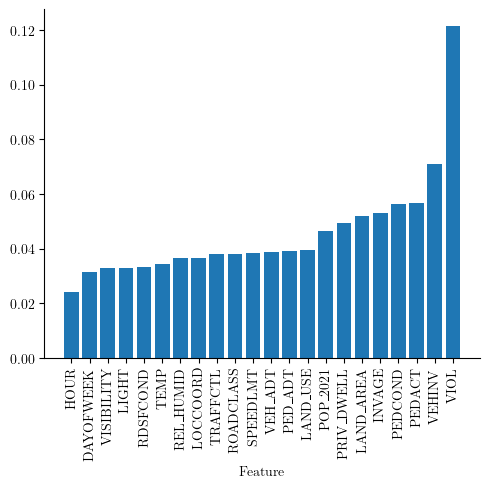

In [17]:
plt.figure(figsize=(5,5))
plt.bar(X_new.columns, sorted(importance))
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
# plt.savefig('feature_importance_xgb.png', dpi=200)

In [14]:
rf = RandomForestClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features='sqrt',
                           max_depth=None, criterion='gini', bootstrap=True, random_state=100)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       random_state=100)

In [15]:
importance_rf = rf.feature_importances_

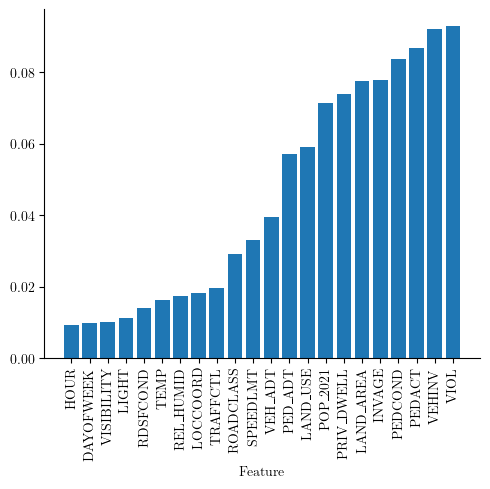

In [18]:
plt.figure(figsize=(5,5))
plt.bar(X_new.columns, sorted(importance_rf))
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
# plt.savefig('feature_importance_rf.png', dpi=200)